In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiakucina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anastasiakucina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()

In [5]:
data = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/singapore_airlines_reviews.csv')
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


<Axes: >

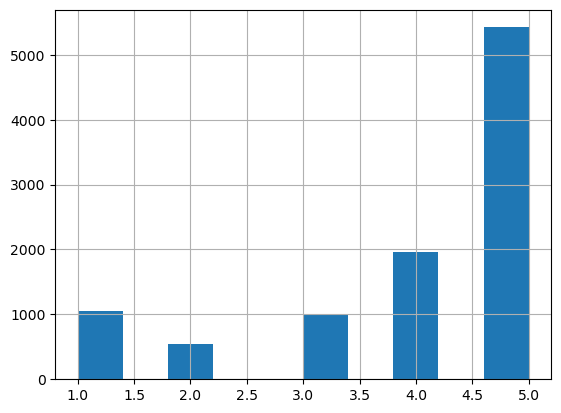

In [7]:
data['rating'].hist()

## EASY

In [8]:
# удаление пунктуации
def text_prepocessing(row):
    row = re.sub(r"[^\w\s]", ' ', row.lower())
    return row

In [9]:
text_prepocessing(data["text"][0])

'we used this airline to go from singapore to london heathrow  we had issues with tickets as they cancelled one of the tickets and trying to get it sorted cost a lot of money due to roaming charges for the lengthy phone calls which were needed to get the ticket reinstated and them trying to charge varying amounts to resolve it  this was a very poor service  \n\nwe got to the airport and had to check in at the desk due to this issue which meant online check in couldn t be done  we were in premium economy which was spacious  two seats on either side of the plane and 3 seats in the middle  the plane seemed relatively new but not brand new  legroom was good  seats were wider and had bigger arm rest in between the two seats which had the fold away tray tables in  there was a good choice of movies and other things such as tv shows  games etc  the food was ok  didn t seem to be much different from economy standard  the flight crew seemed friendly enough  they didn t really go up and down the 

In [10]:
data['clean_text'] = data['text'].apply(text_prepocessing)
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,clean_text
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,we used this airline to go from singapore to l...
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,the service on singapore airlines suites class...
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid and received email confirmation f...
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline in the world seats food servic...
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating on singapore airlines ...


In [11]:
# поделим данные и приведем их к виду  TF-IDF
data_text = data['clean_text']
data_labels = data['rating']

X_train, X_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели
accuracy = f1_score(y_test, y_pred, average='macro')
print(f"F1-sscore модели: {accuracy}")

F1-sscore модели: 0.4582366026394567


/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0, 0.5, '5'),
 Text(0, 1.5, '4'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '2'),
 Text(0, 4.5, '1')]

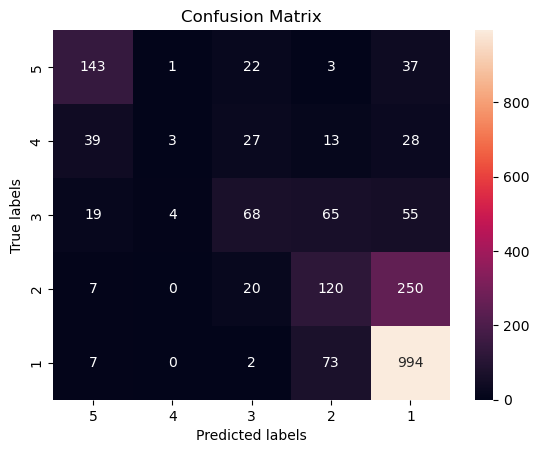

In [13]:
ax= plt.subplot()

cmm = confusion_matrix(y_test,y_pred)
sns.heatmap(cmm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

axiss = ['5','4','3','2','1']    
ax.xaxis.set_ticklabels(axiss)
ax.yaxis.set_ticklabels(axiss)

- Заметно, что модель часто выдает отзыву с рейтингом 5 - оценку 4, и отзыву с оценко 2/1 - оценку 1/2 соответственно

- Поэтому, давайте попробуем разбить оценки на 3 класса - отлично(4-5), хорошо(3), плохо(1-2) - и посчитаем качество на ней(должно стать лучше)


In [14]:
def change_rating(row):
    if row > 3:
        return 3
    elif row < 3:
        return 1
    else:
        return 2
    

In [15]:
data['new_rating'] = data['rating'].apply(change_rating)
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,clean_text,new_rating
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,we used this airline to go from singapore to l...,2
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,the service on singapore airlines suites class...,3
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid and received email confirmation f...,1
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline in the world seats food servic...,3
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating on singapore airlines ...,1


F1-score модели: 0.6584203657624627


[Text(0, 0.5, '3'), Text(0, 1.5, '2'), Text(0, 2.5, '1')]

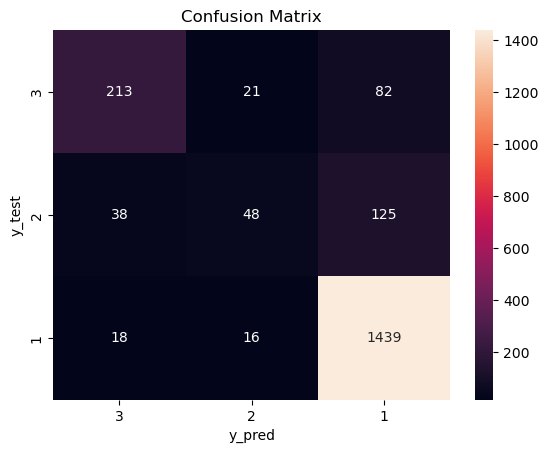

In [16]:
data_text = data['clean_text']
data_labels = data['new_rating']

X_train, X_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели

accuracy = f1_score(y_test, y_pred, average='macro')
print(f"F1-score модели: {accuracy}")

ax= plt.subplot()

cmm = confusion_matrix(y_test,y_pred)
sns.heatmap(cmm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('y_pred');ax.set_ylabel('y_test'); 
ax.set_title('Confusion Matrix'); 
axiss = ['3','2','1']    
ax.xaxis.set_ticklabels(axiss)
ax.yaxis.set_ticklabels(axiss)

## NORMAL


In [17]:
#deleting stop-words + lemmatization
def delete_stop_words_lemmatization(row):
    row_list = row.split(' ')
    
    row_list_withut_stops = [word for word in row_list if word not in en_stops]
    text = [lemmatizer.lemmatize(w) for w in row_list_withut_stops]
    return ' '.join(text)




In [18]:
data['turbo_clean_text'] = data['clean_text'].apply(delete_stop_words_lemmatization)

In [19]:
data['turbo_clean_text'][0]

'used airline go singapore london heathrow  issue ticket cancelled one ticket trying get sorted cost lot money due roaming charge lengthy phone call needed get ticket reinstated trying charge varying amount resolve  poor service  \n\nwe got airport check desk due issue meant online check done  premium economy spacious  two seat either side plane 3 seat middle  plane seemed relatively new brand new  legroom good  seat wider bigger arm rest two seat fold away tray table  good choice movie thing tv show  game etc  food ok  seem much different economy standard  flight crew seemed friendly enough  really go isle drink maybe twice whole 13 14 hour flight  airline would done quite often \n\noverall flight ok  seat comfy  legroom good  food ok  flight crew could attentive especially premium economy  would expect service slightly better economy '

In [20]:

data_text = data['turbo_clean_text']
data_labels = data['new_rating']

X_train, X_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM_linear": SVC(kernel='linear'),
    "SVM_poly": SVC(kernel='poly'),
    "SVM_rbf": SVC(kernel='rbf'),
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
}

best_model = None
worst_model = None
best_accuracy = 0
worst_accuracy = 1

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = f1_score(y_test, y_pred, average = 'macro')
    print(f"F1-score of {name}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
    if accuracy < worst_accuracy:
        worst_accuracy = accuracy
        worst_model = name

print("Best model:", best_model)
print("Worst model:", worst_model)

F1-score of Logistic Regression: 0.6434395934395934
F1-score of SVM_linear: 0.668024416993969
F1-score of SVM_poly: 0.30293155887639894
F1-score of SVM_rbf: 0.5982308794485536
F1-score of GradientBoostingClassifier: 0.5863860188557867
Best model: SVM_linear
Worst model: SVM_poly


In [28]:
## Предсказываемый хороший или плохой отзыв мы написали:
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)
testik = tfidf_vectorizer.transform(pd.Series(['it was very uncomforlable flight because of changes in schedule and pilot was awful i would never recommed this company','we had a flight from london to paris by this airlane it was pretty good the flight attendants were polite']))
pred_testik = model.predict(testik)
pred_testik

array([1, 3])

### Вывод:

- Плохой отзыв определен верно, положительный тоже - SVC_linear молодец!